In [44]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


In [3]:
file_path = "toy_network2.txt"

In [20]:
G = nx.read_weighted_edgelist(file_path,
                              nodetype=int,
                              create_using=nx.Graph())
charger_nodes = [2,4,7,9,13]

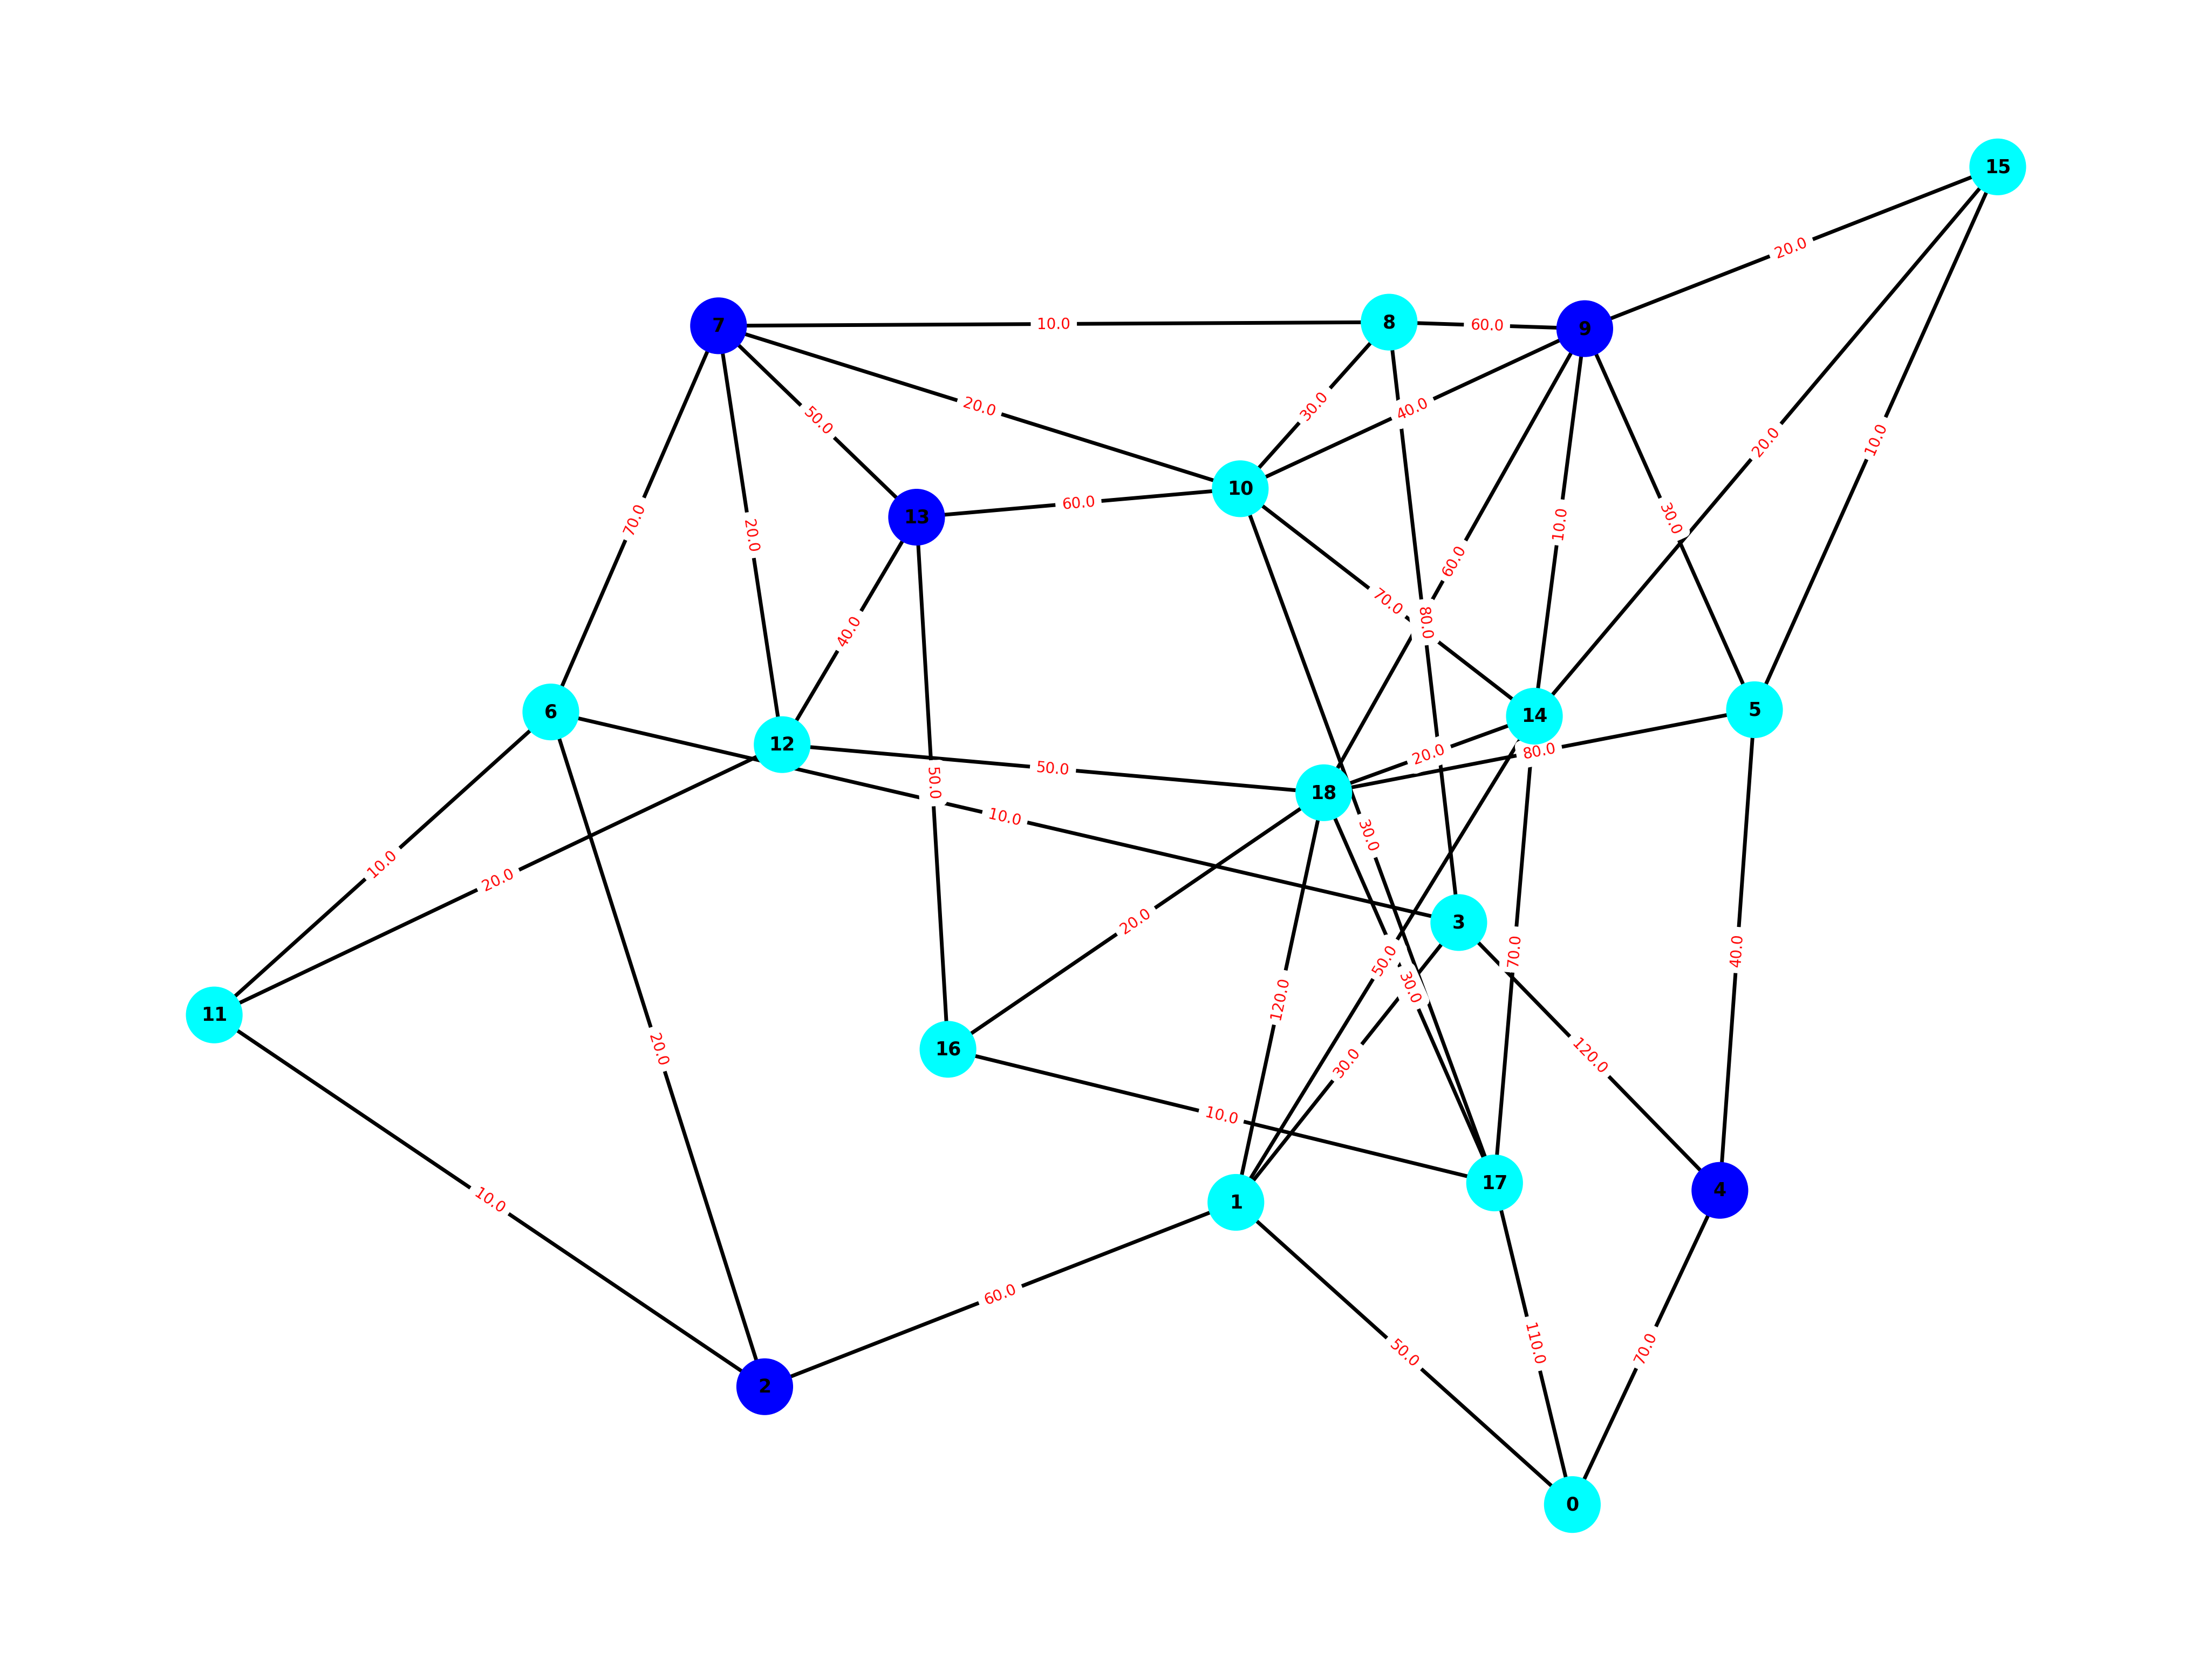

In [29]:
figure = plt.figure(figsize=(8,6),
                    dpi = 500)
node_colors = []
for node in G.nodes():
    if node in charger_nodes:
        node_colors.append('blue')
    else:
        node_colors.append('cyan')

pos = nx.spring_layout(G, seed=40)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G,
        pos,
        with_labels = True,
        font_weight = 'bold',
        node_size = 200,
        node_color = node_colors,
        font_size = 5,
        font_color = 'black')
nx.draw_networkx_edge_labels(G,
                             pos,
                             edge_labels=edge_labels,
                             font_color='red',
                             font_size=4)

plt.show()

In [34]:
# nx.dijkstra_predecessor_and_distance?
nx.dijkstra_path(G,
                 source = 0,
                 target = 15,
                 weight = 'weight')

[0, 1, 14, 15]

In [46]:
pred, dist = nx.dijkstra_predecessor_and_distance(G, source=0)
data = []
for node, distance in dist.items():
    print(node,"\t",distance)

0 	 0
1 	 50.0
4 	 70.0
3 	 80.0
6 	 90.0
14 	 100.0
11 	 100.0
17 	 110.0
2 	 110.0
5 	 110.0
9 	 110.0
15 	 120.0
18 	 120.0
12 	 120.0
16 	 120.0
10 	 140.0
7 	 140.0
8 	 150.0
13 	 160.0


In [50]:
all_pairs_paths = dict(nx.all_pairs_shortest_path(G))

# Create a list to store the source, target, paths, and lengths
data = []
for source, paths in all_pairs_paths.items():
    for target, path in paths.items():
        # Calculate the path length by summing the weights of the edges in the path
        path_length = sum(G[u][v]['weight'] for u, v in zip(path[:-1], path[1:]))
        data.append({'Source': source, 'Target': target, 'Path': path, 'Length': path_length})

# Convert the list to a DataFrame
df = pd.DataFrame(data)
df

,Source,Target,Path,Length
0,0,0,[0],0.0
1,0,1,"[0, 1]",50.0
2,0,4,"[0, 4]",70.0
3,0,17,"[0, 17]",110.0
4,0,2,"[0, 1, 2]",110.0
...,...,...,...,...
356,16,11,"[16, 13, 12, 11]",110.0
357,16,4,"[16, 17, 0, 4]",190.0
358,16,15,"[16, 17, 14, 15]",100.0
359,16,2,"[16, 18, 1, 2]",200.0


In [58]:
df[df['Length']==df['Length'].max()]

,Source,Target,Path,Length
56,4,13,"[4, 0, 17, 10, 13]",270.0


In [69]:
charger_nodes = [2,4,7,9,13]
s2c_df = df[df['Target'].isin(charger_nodes) &
            ~df['Source'].isin(charger_nodes)]
s2c_df


,Source,Target,Path,Length
2,0,4,"[0, 4]",70.0
4,0,2,"[0, 1, 2]",110.0
14,0,9,"[0, 1, 18, 9]",230.0
17,0,7,"[0, 17, 10, 7]",160.0
18,0,13,"[0, 17, 10, 13]",200.0
...,...,...,...,...
343,16,13,"[16, 13]",50.0
346,16,7,"[16, 13, 7]",100.0
353,16,9,"[16, 18, 9]",80.0
357,16,4,"[16, 17, 0, 4]",190.0


In [70]:
c2d_df = df[df['Source'].isin(charger_nodes) &
            ~df['Target'].isin(charger_nodes)]
c2d_df

,Source,Target,Path,Length
39,4,0,"[4, 0]",70.0
40,4,3,"[4, 3]",120.0
41,4,5,"[4, 5]",40.0
42,4,1,"[4, 0, 1]",120.0
43,4,17,"[4, 0, 17]",180.0
...,...,...,...,...
317,13,3,"[13, 7, 6, 3]",130.0
318,13,5,"[13, 10, 9, 5]",130.0
319,13,15,"[13, 10, 9, 15]",120.0
320,13,1,"[13, 10, 14, 1]",180.0


In [71]:
c2c_df = df[(df['Source'].isin(charger_nodes)) &
            (df['Target'].isin(charger_nodes)) &
            (df['Source'] != df['Target'])]
c2c_df

,Source,Target,Path,Length
46,4,9,"[4, 5, 9]",70.0
49,4,2,"[4, 0, 1, 2]",180.0
53,4,7,"[4, 3, 6, 7]",200.0
56,4,13,"[4, 0, 17, 10, 13]",270.0
84,2,7,"[2, 6, 7]",90.0
86,2,4,"[2, 1, 0, 4]",180.0
90,2,9,"[2, 1, 18, 9]",240.0
94,2,13,"[2, 6, 7, 13]",140.0
216,9,4,"[9, 5, 4]",70.0
218,9,7,"[9, 8, 7]",70.0


In [74]:
node_count = G.number_of_nodes()